## Data Collection and Initial Exploration

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
# Loading dataset
df = pd.read_csv("tmdb_movies.csv")
df.head()

,id,title,genre,release_date,release_year,budget,revenue,runtime,vote_average,vote_count,production_country
0,1,Movie Title 1,"Science Fiction, Comedy, Horror",1957-01-01,1957,36972721,1.306928e+08,123,4.496790,9221,Germany
1,2,Movie Title 2,"Documentary, Romance",1999-01-01,1999,96359319,2.947975e+08,146,5.803306,4592,China
2,3,Movie Title 3,"Science Fiction, Action",1941-01-01,1941,135172742,1.048409e+08,168,2.710639,7146,Japan
3,4,Movie Title 4,"Comedy, Drama, Adventure",1961-01-01,1961,129049379,1.535585e+08,134,5.631398,8363,Germany
4,5,Movie Title 5,"Comedy, Romance",1969-01-01,1969,151390401,1.008291e+08,116,4.245862,9487,Japan


In [6]:
#Basic information.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  100 non-null    int64  
 1   title               100 non-null    object 
 2   genre               100 non-null    object 
 3   release_date        100 non-null    object 
 4   release_year        100 non-null    int64  
 5   budget              100 non-null    int64  
 6   revenue             100 non-null    float64
 7   runtime             100 non-null    int64  
 8   vote_average        100 non-null    float64
 9   vote_count          100 non-null    int64  
 10  production_country  100 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 8.7+ KB


In [7]:
# Summary Statistics
df.describe()


,id,release_year,budget,revenue,runtime,vote_average,vote_count
count,100.000000,100.00000,1.000000e+02,1.000000e+02,100.000000,100.000000,100.000000
mean,50.500000,1980.89000,1.199285e+08,3.325427e+08,128.560000,5.403200,5498.100000
std,29.011492,24.03066,7.501923e+07,2.760798e+08,29.265183,2.716531,2844.219378
min,1.000000,1940.00000,1.581646e+06,4.004654e+06,80.000000,1.076640,21.000000
25%,25.750000,1961.00000,4.954816e+07,9.697859e+07,102.500000,2.898215,3057.500000
50%,50.500000,1981.00000,1.174061e+08,2.541225e+08,132.000000,5.157603,5714.500000
75%,75.250000,1999.25000,1.881243e+08,5.287118e+08,151.000000,7.944961,8172.750000
max,100.000000,2024.00000,2.452930e+08,1.105000e+09,177.000000,9.956007,9990.000000


In [8]:
# Checking NULL values.
df.isnull().sum()

id                    0
title                 0
genre                 0
release_date          0
release_year          0
budget                0
revenue               0
runtime               0
vote_average          0
vote_count            0
production_country    0
dtype: int64

## Data Cleaning and Transformation

In [11]:
# Dropping ID and Title.
df = df.drop(['id','title'], axis = 1)
df.head()

,genre,release_date,release_year,budget,revenue,runtime,vote_average,vote_count,production_country
0,"Science Fiction, Comedy, Horror",1957-01-01,1957,36972721,1.306928e+08,123,4.496790,9221,Germany
1,"Documentary, Romance",1999-01-01,1999,96359319,2.947975e+08,146,5.803306,4592,China
2,"Science Fiction, Action",1941-01-01,1941,135172742,1.048409e+08,168,2.710639,7146,Japan
3,"Comedy, Drama, Adventure",1961-01-01,1961,129049379,1.535585e+08,134,5.631398,8363,Germany
4,"Comedy, Romance",1969-01-01,1969,151390401,1.008291e+08,116,4.245862,9487,Japan


In [12]:
# Converting release date into date and time formate.
df['release_date'] = pd.to_datetime(df['release_date'])
#Extracting individual date and month.
df['release_month'] = df['release_date'].dt.month
df['release_day']= df['release_date'].dt.day
# Dropping the release_date(original)
df = df.drop('release_date', axis=1)

In [13]:
df.head()

,genre,release_year,budget,revenue,runtime,vote_average,vote_count,production_country,release_month,release_day
0,"Science Fiction, Comedy, Horror",1957,36972721,1.306928e+08,123,4.496790,9221,Germany,1,1
1,"Documentary, Romance",1999,96359319,2.947975e+08,146,5.803306,4592,China,1,1
2,"Science Fiction, Action",1941,135172742,1.048409e+08,168,2.710639,7146,Japan,1,1
3,"Comedy, Drama, Adventure",1961,129049379,1.535585e+08,134,5.631398,8363,Germany,1,1
4,"Comedy, Romance",1969,151390401,1.008291e+08,116,4.245862,9487,Japan,1,1


In [14]:
#Encoding genre and production_country.
df = pd.get_dummies(df, columns=['genre', 'production_country'], drop_first=True)

In [16]:
# Checking final dataset
df.head()

,release_year,budget,revenue,runtime,vote_average,vote_count,release_month,release_day,"genre_Action, Adventure","genre_Action, Adventure, Horror",...,"genre_Science Fiction, Drama","genre_Science Fiction, Horror","genre_Science Fiction, Horror, Adventure",production_country_China,production_country_France,production_country_Germany,production_country_India,production_country_Japan,production_country_United Kingdom,production_country_United States of America
0,1957,36972721,1.306928e+08,123,4.496790,9221,1,1,False,False,...,False,False,False,False,False,True,False,False,False,False
1,1999,96359319,2.947975e+08,146,5.803306,4592,1,1,False,False,...,False,False,False,True,False,False,False,False,False,False
2,1941,135172742,1.048409e+08,168,2.710639,7146,1,1,False,False,...,False,False,False,False,False,False,False,True,False,False
3,1961,129049379,1.535585e+08,134,5.631398,8363,1,1,False,False,...,False,False,False,False,False,True,False,False,False,False
4,1969,151390401,1.008291e+08,116,4.245862,9487,1,1,False,False,...,False,False,False,False,False,False,False,True,False,False


In [17]:
#Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 83 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   release_year                                 100 non-null    int64  
 1   budget                                       100 non-null    int64  
 2   revenue                                      100 non-null    float64
 3   runtime                                      100 non-null    int64  
 4   vote_average                                 100 non-null    float64
 5   vote_count                                   100 non-null    int64  
 6   release_month                                100 non-null    int32  
 7   release_day                                  100 non-null    int32  
 8   genre_Action, Adventure                      100 non-null    bool   
 9   genre_Action, Adventure, Horror              100 non-null    bool   
 10  gen

In [18]:
# solving overfitting problem.
df = df.astype(int)

In [19]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 83 columns):
 #   Column                                       Non-Null Count  Dtype
---  ------                                       --------------  -----
 0   release_year                                 100 non-null    int32
 1   budget                                       100 non-null    int32
 2   revenue                                      100 non-null    int32
 3   runtime                                      100 non-null    int32
 4   vote_average                                 100 non-null    int32
 5   vote_count                                   100 non-null    int32
 6   release_month                                100 non-null    int32
 7   release_day                                  100 non-null    int32
 8   genre_Action, Adventure                      100 non-null    int32
 9   genre_Action, Adventure, Horror              100 non-null    int32
 10  genre_Action, Adventure, Sc

## Exploratory Data Analysis (EDA)

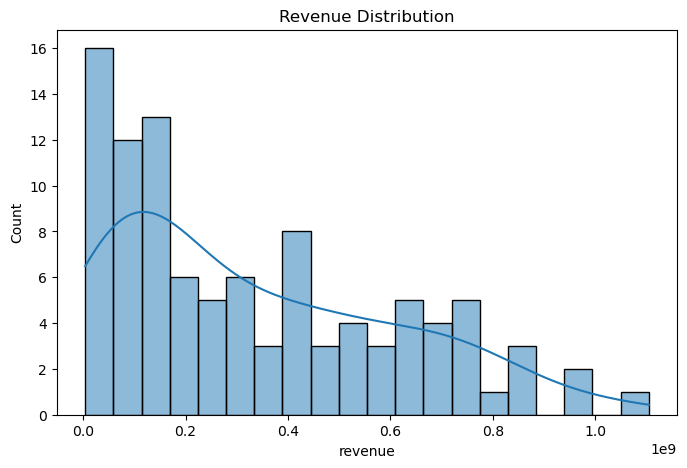

In [21]:
plt.figure(figsize=(8,5))
sns.histplot(df['revenue'], bins=20, kde=True)
plt.title("Revenue Distribution")
plt.show()

#### The revenue distribution is positively skewed, indicating that while most movies generate moderate revenue, a few high-performing movies earn exceptionally large amounts.

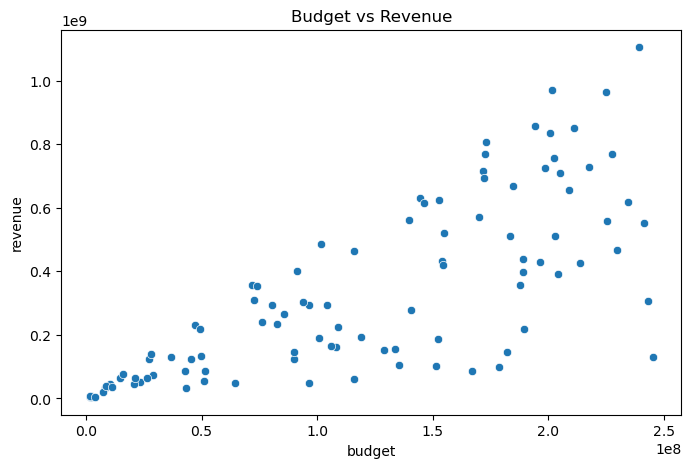

In [22]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='budget', y='revenue', data=df)
plt.title("Budget vs Revenue")
plt.show()

#### There is a strong positive relationship between budget and revenue. Movies with higher production budgets tend to generate higher revenue.

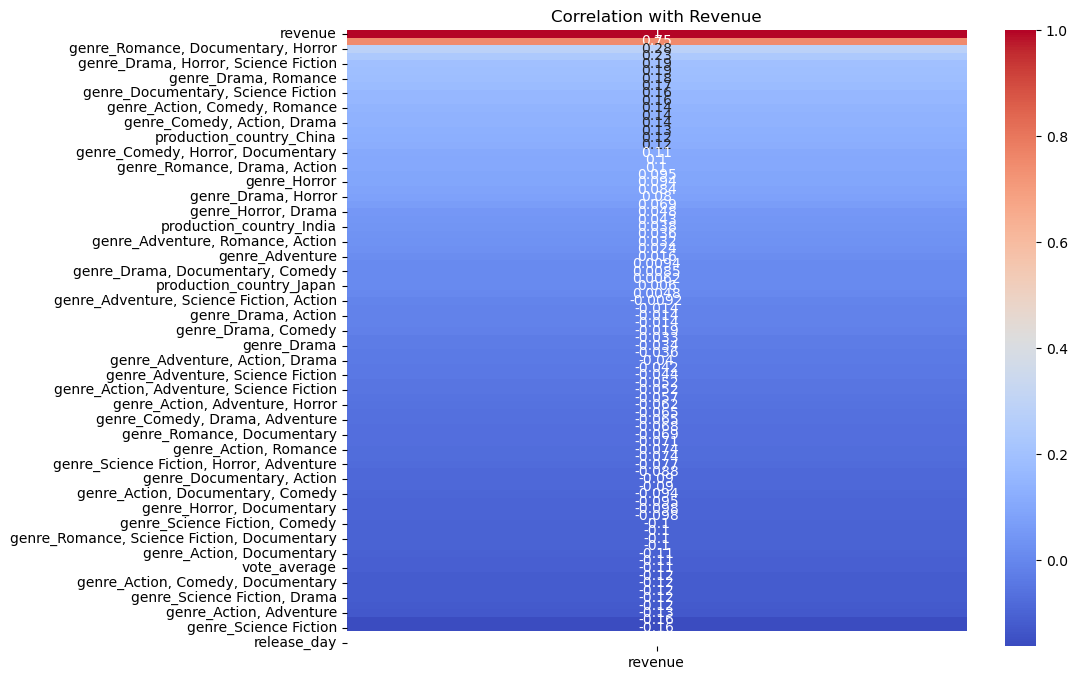

In [23]:
plt.figure(figsize=(10,8))
corr = df.corr()
sns.heatmap(corr[['revenue']].sort_values(by='revenue', ascending=False), annot=True, cmap='coolwarm')
plt.title("Correlation with Revenue")
plt.show()

In [24]:
#Sort correlation with revenue.
corr = df.corr()['revenue'].sort_values(ascending=False)
print(corr.head(10))

revenue                                 1.000000
budget                                  0.754261
genre_Romance, Documentary, Horror      0.282621
genre_Comedy, Drama, Science Fiction    0.233562
genre_Drama, Horror, Science Fiction    0.192163
genre_Adventure, Drama                  0.190067
genre_Drama, Romance                    0.183327
genre_Comedy, Drama                     0.173460
genre_Documentary, Science Fiction      0.159508
genre_Science Fiction, Horror           0.155656
Name: revenue, dtype: float64


In [25]:
# Select only numerical base features first
base_features = ['release_year', 'budget', 'runtime', 
                 'vote_average', 'vote_count',
                 'release_month', 'release_day']

X = df[base_features]
y = df['revenue']

# Model Development

In [26]:
# Prepareing features
features = ['budget', 'runtime', 'vote_average', 
            'vote_count', 'release_year']

X = df[features]
y = df['revenue']

In [27]:
# Train-test Split 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Linear Regression

In [28]:
# Train Linear Regression
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [30]:
# Make Prediction.
y_pred = model.predict(X_test)

In [31]:
# Model Evaluation.
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R2 Score:", r2)

MAE: 124698725.40059957
RMSE: 156654231.2604239
R2 Score: 0.5045083619279269


## Random Forest Regressor

In [32]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)


In [33]:
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest MAE:", mae_rf)
print("Random Forest RMSE:", rmse_rf)
print("Random Forest R2 Score:", r2_rf)

Random Forest MAE: 152492162.18275002
Random Forest RMSE: 196584664.3111569
Random Forest R2 Score: 0.21971844516723638


### Linear Regression outperformed Random Forest because the dataset is small and the primary predictor (budget) has a strong linear relationship with revenue.

# Improve Linear Model Properly

In [34]:
features = ['budget', 'runtime', 'vote_average', 
            'vote_count', 'release_year',
            'release_month']

X = df[features]
y = df['revenue']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("R2:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2: 0.5045083619279271
RMSE: 156654231.2604239


In [35]:
coefficients = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_
})

print(coefficients.sort_values(by='Coefficient', ascending=False))

         Feature   Coefficient
4   release_year  9.124420e+05
0         budget  2.686191e+00
5  release_month  0.000000e+00
3     vote_count -2.752210e+02
1        runtime -4.240365e+05
2   vote_average -1.225998e+07


# Cross Validation

In [36]:
from sklearn.model_selection import cross_val_score

model = LinearRegression()

cv_scores = cross_val_score(
    model,
    X,
    y,
    cv=5,
    scoring='r2'
)

print("Cross Validation R2 Scores:", cv_scores)
print("Average CV R2:", cv_scores.mean())

Cross Validation R2 Scores: [0.3494108  0.62865096 0.59990217 0.0920016  0.49072372]
Average CV R2: 0.4321378514073557
